### This function will calculate the ca and cf values that produces a profit margin within the range of 0.06 and 0.07 or a specific profit_margin

In [88]:
import numpy as np

def calculate_profit_margin(f, a, p):
    ca_range = np.arange(0, 1000, 10)  # define range for ca
    cf_range = np.arange(0, 1000, 10)  # define range for cf
    
    for ca in ca_range:
        for cf in cf_range:
            ct = (ca/a) + (cf*f)
            profit_margin = (p - ct) / p
            if 0.065 <= profit_margin <= 0.08:
                print('f:', f, 'a:', a, 'p:', p, 'ca:', ca, 'cf:', cf, 'profit margin:', profit_margin)

# test the function
calculate_profit_margin(24, 9.2, 17518)


f: 24 a: 9.2 p: 17518 ca: 0 cf: 680 profit margin: 0.06838680214636374
f: 24 a: 9.2 p: 17518 ca: 10 cf: 680 profit margin: 0.06832475416590136
f: 24 a: 9.2 p: 17518 ca: 20 cf: 680 profit margin: 0.06826270618543909
f: 24 a: 9.2 p: 17518 ca: 30 cf: 680 profit margin: 0.06820065820497671
f: 24 a: 9.2 p: 17518 ca: 40 cf: 680 profit margin: 0.06813861022451444
f: 24 a: 9.2 p: 17518 ca: 50 cf: 680 profit margin: 0.06807656224405206
f: 24 a: 9.2 p: 17518 ca: 60 cf: 680 profit margin: 0.06801451426358979
f: 24 a: 9.2 p: 17518 ca: 70 cf: 680 profit margin: 0.06795246628312741
f: 24 a: 9.2 p: 17518 ca: 80 cf: 680 profit margin: 0.06789041830266504
f: 24 a: 9.2 p: 17518 ca: 90 cf: 680 profit margin: 0.06782837032220276
f: 24 a: 9.2 p: 17518 ca: 100 cf: 680 profit margin: 0.06776632234174039
f: 24 a: 9.2 p: 17518 ca: 110 cf: 680 profit margin: 0.06770427436127811
f: 24 a: 9.2 p: 17518 ca: 120 cf: 680 profit margin: 0.06764222638081574
f: 24 a: 9.2 p: 17518 ca: 130 cf: 680 profit margin: 0.0675801

### The below code using regression on the 3 input fields to find the ca and cf values and then iteratively modifies the ca and cf values until it is closest to the range acceptable for the profit_margin 

f: 20 a: 9.69 p: 17885 ca: 613.3554295240215 cf: 827.9556650160112 profit margin: 0.07059485187224435


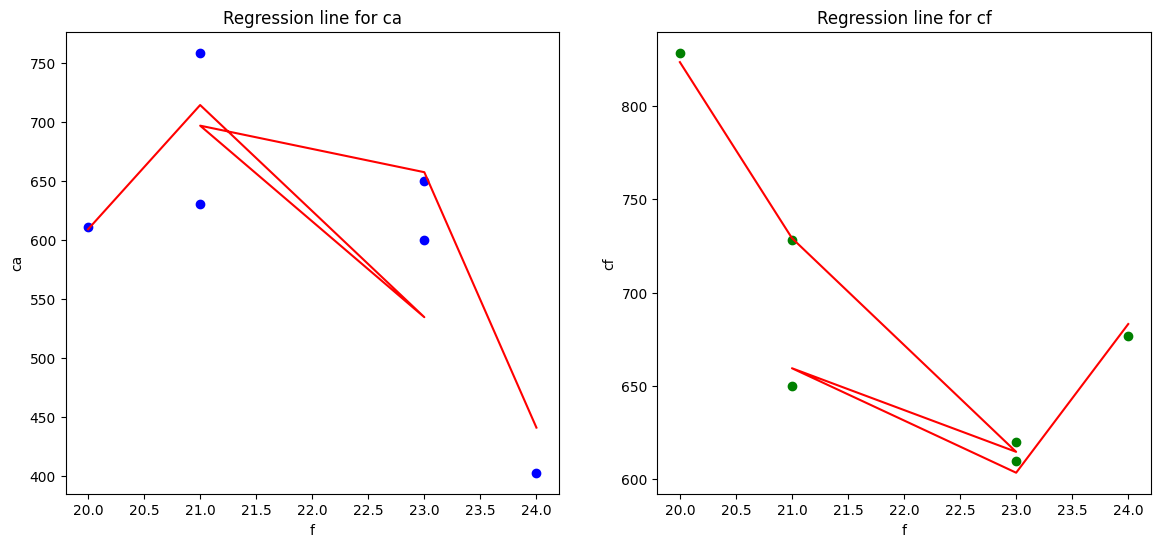

In [81]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Your training data
X = np.array([[20, 9.69, 17885],
              [21, 8.47, 16535],
              [23, 9.1, 15350],
              [21, 8.75, 14999],
              [23, 8.11, 15140],
              [24, 9.2, 17518]])  # f, a, p values
y = np.array([[611.0, 828.5],
              [758.5, 728.0],
              [600, 620],
              [630, 650],
              [650, 610],
              [402.5, 677.0]])  # corresponding ca, cf values

# Define the multioutput regression model
model = MultiOutputRegressor(LinearRegression())

# Train the model
model.fit(X, y)

def predict(f, a, p):

# Predict ca and cf values
    ca_pred, cf_pred = model.predict(np.array([[f, a, p]]))[0]

    # Calculate ct and profit margin
    ct = (ca_pred / a) + (cf_pred / f)
    profit_margin = (p - ct) / p

    # Counter for maximum iterations
    counter = 0

    # Adjust ca and cf values until profit margin is between 0.0699 and 0.0711
    while ((profit_margin < 0.0699 or profit_margin > 0.0711) and counter < 10000):
        if profit_margin < 0.0699:
            ca_pred -= 0.5
            cf_pred -= 0.5
        else:
            ca_pred += 0.5
            cf_pred += 0.5

        # Break if ca or cf become negative
        if ca_pred <= 0 or cf_pred <= 0:
            print('No solution found with positive ca and cf values.')
            return

        ct = (ca_pred / a) + (cf_pred * f)
        profit_margin = (p - ct) / p
        counter += 1

    # Print all values
    print('f:', f, 'a:', a, 'p:', p, 'ca:', ca_pred, 'cf:', cf_pred, 'profit margin:', profit_margin)


    # Plot regression lines for ca and cf
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 0], y[:, 0], color='blue')  # Plot ca values
    plt.plot(X[:, 0], model.predict(X)[:, 0], color='red')
    plt.title('Regression line for ca')
    plt.xlabel('f')
    plt.ylabel('ca')

    plt.subplot(1, 2, 2)
    plt.scatter(X[:, 0], y[:, 1], color='green')  # Plot cf values
    plt.plot(X[:, 0], model.predict(X)[:, 1], color='red')
    plt.title('Regression line for cf')
    plt.xlabel('f')
    plt.ylabel('cf')

    plt.show()

# Test the function
predict(20, 9.69, 17885)


### The below code using an optimzation approach 

First, we define our objective function. In this case, it's the difference from our target profit margin range. The objective function will return 0 if the profit margin is within the desired range, otherwise it will return how far away it is from the range.

Then, in the predict function, we use the minimize function from scipy.optimize to find the 'ca' and 'cf' values that minimize our objective function. We also set bounds to ensure 'ca' and 'cf' are positive.

If the optimization is successful, we print the optimal 'ca' and 'cf' values and the resulting profit margin. If the optimization fails, we print an error message.

Remember to install the necessary libraries by running !pip install numpy scipy sklearn.

In [86]:
import numpy as np
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

# Your training data
X = np.array([[20, 9.69, 17885],
              [21, 8.47, 16535],
              [23, 9.1, 15350],
              [21, 8.75, 14999],
              [23, 8.11, 15140],
              [24, 9.2, 17518]])  # f, a, p values
y = np.array([[611.0, 828.5],
              [758.5, 728.0],
              [600, 620],
              [630, 650],
              [650, 610],
              [402.5, 677.0]])  # corresponding ca, cf values

# Define the multioutput regression model
model = MultiOutputRegressor(LinearRegression())

# Train the model
model.fit(X, y)

def objective(vars, f, a, p):
    ca, cf = vars
    ct = (ca / a) + (cf * f)
    profit_margin = (p - ct) / p

    # Here we are minimizing the difference from our target profit margin range
    if profit_margin < 0.065:
        return 0.065 - profit_margin
    elif profit_margin > 0.075:
        return profit_margin - 0.075
    else:
        return 0

def predict(f, a, p):
    # Predict initial ca and cf values
    ca_pred, cf_pred = model.predict(np.array([[f, a, p]]))[0]

    # Use optimization to find best ca and cf values
    result = minimize(objective, [ca_pred, cf_pred], args=(f, a, p), bounds=((0, None), (0, None)))

    if result.success:
        ca_opt, cf_opt = result.x
        ct_opt = (ca_opt / a) + (cf_opt * f)
        profit_margin_opt = (p - ct_opt) / p

        print('f:', f, 'a:', a, 'p:', p, 'ca:', ca_opt, 'cf:', cf_opt, 'profit margin:', profit_margin_opt)
    else:
        print('Optimization failed:', result.message)

# Test the function
predict(20, 9.69, 17885)


f: 20 a: 9.69 p: 17885 ca: 609.1193289242358 cf: 830.3631994066961 profit margin: 0.0679270561926748
